#   <span style='background :yellow' > ***Author: TANMAY SINHA*** </span>



# The Sparks Foundation

# TASK 8 - TIMELINE ANALYSIS:COVID19 


## Objectives :
    



### Create a storyboard showing spread of Covid-19 cases in your country or
### any region (Asia, Europe, BRICS etc) using Tableau, Power BI or SAP



### Use animation, timeline and annotations to create attractive and interactive
### dashboards and story
 
 
 
### Identify interesting patterns and possible reasons helping Covid-19 spread
### with basic as well as advanced charts



### Screen-record the completed storyboard along with your audio explaining the charts 
### and giving recommendations.



### Dataset: Daily updated .csv file on https://bit.ly/30d2gdi


# IMPORTING THE LIBRARIES

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


# LOADING THE DATASET

In [25]:
covid_data = pd.read_csv('F:\The Sparks Foundation Task_AUG2021\Task 8-Timeline Analysis  Covid-19\owid-covid-data.csv');
covid_data.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [26]:
covid_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,1.048250e+05,104822.000000,103812.000000,9.438400e+04,94539.000000,103812.000000,104270.000000,104267.000000,103262.000000,93842.000000,...,65807.000000,97710.000000,100421.000000,76339.000000,75225.000000,49078.000000,88903.000000,103941.000000,97808.000000,3874.000000
mean,1.232420e+06,6245.678693,6245.393950,3.233936e+04,145.816393,131.911106,15250.521554,78.508285,78.508981,328.988741,...,13.447724,258.865113,7.962450,10.583145,32.719783,50.784797,3.025661,73.249384,0.726935,18.202006
std,8.336122e+06,38480.071049,38024.390309,1.930186e+05,796.505136,742.118199,27031.034592,202.377403,159.326826,577.436248,...,19.975267,119.178709,4.195242,10.485678,13.494152,31.756171,2.455802,7.552445,0.150297,35.407299
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3162.163000,-276.825000,0.001000,...,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-95.590000
25%,1.562000e+03,2.000000,8.143000,6.100000e+01,0.000000,0.000000,298.783000,0.246500,1.429000,9.108000,...,0.600000,168.711000,5.310000,1.900000,21.600000,19.351000,1.300000,67.920000,0.602000,0.560000
50%,1.645500e+04,81.000000,100.286000,4.870000e+02,2.000000,1.429000,2230.077000,9.407000,12.626000,59.945500,...,2.200000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.620000,0.744000,7.605000
75%,1.736320e+05,862.000000,910.892750,4.566250e+03,18.000000,15.000000,16752.309000,74.368000,82.385250,374.285750,...,21.200000,329.942000,10.080000,19.300000,41.100000,83.241000,3.861000,78.740000,0.848000,23.985000
max,2.068075e+08,905993.000000,826368.143000,4.354756e+06,18000.000000,14726.429000,193153.433000,18293.675000,4083.500000,5985.106000,...,77.600000,724.417000,30.530000,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,410.620000


In [27]:
covid_data.shape

(109518, 62)

In [33]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93733 entries, 0 to 93732
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               93733 non-null  object 
 1   continent                              89298 non-null  object 
 2   location                               93733 non-null  object 
 3   date                                   93733 non-null  object 
 4   total_cases                            90755 non-null  float64
 5   new_cases                              90754 non-null  float64
 6   new_cases_smoothed                     89742 non-null  float64
 7   total_deaths                           80800 non-null  float64
 8   new_deaths                             80958 non-null  float64
 9   new_deaths_smoothed                    89742 non-null  float64
 10  total_cases_per_million                90270 non-null  float64
 11  ne

In [28]:
covid_data.value_counts

<bound method DataFrame.value_counts of        iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1           AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2           AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3           AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4           AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   
...         ...       ...          ...         ...          ...        ...   
109513      ZWE    Africa     Zimbabwe  2021-08-10     117258.0      405.0   
109514      ZWE    Africa     Zimbabwe  2021-08-11     117954.0      696.0   
109515      ZWE    Africa     Zimbabwe  2021-08-12     118754.0      800.0   
109516      ZWE    Africa     Zimbabwe  2021-08-13     119508.0      754.0   
109517      ZWE    Africa     Zimbabwe  2021-08-14     119853.0      345.0   

        new_cases_smoot

In [36]:
covid_data.isnull().any()

iso_code                                 False
continent                                 True
location                                 False
date                                     False
total_cases                               True
new_cases                                 True
new_cases_smoothed                        True
total_deaths                              True
new_deaths                                True
new_deaths_smoothed                       True
total_cases_per_million                   True
new_cases_per_million                     True
new_cases_smoothed_per_million            True
total_deaths_per_million                  True
new_deaths_per_million                    True
new_deaths_smoothed_per_million           True
reproduction_rate                         True
icu_patients                              True
icu_patients_per_million                  True
hosp_patients                             True
hosp_patients_per_million                 True
weekly_icu_ad

In [29]:
covid_data.nunique()

iso_code                        232
continent                         6
location                        232
date                            592
total_cases                   58905
                              ...  
handwashing_facilities           96
hospital_beds_per_thousand      101
life_expectancy                 207
human_development_index         153
excess_mortality               2816
Length: 62, dtype: int64

In [30]:
covid_data.isnull().sum()

iso_code                           0
continent                       5065
location                           0
date                               0
total_cases                     4693
                               ...  
handwashing_facilities         60440
hospital_beds_per_thousand     20615
life_expectancy                 5577
human_development_index        11710
excess_mortality              105644
Length: 62, dtype: int64

In [31]:
covid_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [32]:
covid_data.location.value_counts()[0:100]

Peru             592
Mexico           592
Argentina        592
Thailand         589
Taiwan           577
                ... 
Bangladesh       530
Hungary          530
Jordan           530
Libya            529
Liechtenstein    529
Name: location, Length: 100, dtype: int64

# Analysis of Covid Cases across India:

Collecting India Data from the given dataset:

In [33]:
india_data = covid_data[covid_data['location'] =='India']
india_data = india_data[~india_data['new_cases'].isin(['World','International'])]
india_data.head(100)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
45250,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45251,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45252,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45253,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45254,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45345,IND,Asia,India,2020-05-04,46437.0,3932.0,2426.571,1566.0,175.0,89.571,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45346,IND,Asia,India,2020-05-05,49400.0,2963.0,2582.286,1693.0,127.0,97.857,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45347,IND,Asia,India,2020-05-06,52987.0,3587.0,2846.429,1785.0,92.0,100.857,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45348,IND,Asia,India,2020-05-07,56351.0,3364.0,3069.714,1889.0,104.0,105.000,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN


In [34]:
top_10_india_deaths  = india_data.sort_values("total_deaths", ascending = False)
top_10_india_deaths.head(10)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
45812,IND,Asia,India,2021-08-14,32192576.0,36083.0,36874.429,431225.0,493.0,480.429,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45811,IND,Asia,India,2021-08-13,32156493.0,38667.0,37301.143,430732.0,478.0,480.143,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45810,IND,Asia,India,2021-08-12,32117826.0,40120.0,37295.571,430254.0,585.0,500.000,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45809,IND,Asia,India,2021-08-11,32077706.0,41195.0,37941.714,429669.0,490.0,482.714,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45808,IND,Asia,India,2021-08-10,32036511.0,38353.0,38197.000,429179.0,497.0,488.857,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45807,IND,Asia,India,2021-08-09,31998158.0,28204.0,38807.286,428682.0,373.0,498.143,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45806,IND,Asia,India,2021-08-08,31969954.0,35499.0,39142.286,428309.0,447.0,505.143,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45805,IND,Asia,India,2021-08-07,31934455.0,39070.0,39804.429,427862.0,491.0,501.571,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45804,IND,Asia,India,2021-08-06,31895385.0,38628.0,40198.857,427371.0,617.0,508.714,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45803,IND,Asia,India,2021-08-05,31856757.0,44643.0,40630.429,426754.0,464.0,505.286,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN


In [35]:
top_10_india_deaths  = india_data.sort_values("total_cases", ascending = False)
top_10_india_deaths.head(10)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
45812,IND,Asia,India,2021-08-14,32192576.0,36083.0,36874.429,431225.0,493.0,480.429,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45811,IND,Asia,India,2021-08-13,32156493.0,38667.0,37301.143,430732.0,478.0,480.143,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45810,IND,Asia,India,2021-08-12,32117826.0,40120.0,37295.571,430254.0,585.0,500.000,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45809,IND,Asia,India,2021-08-11,32077706.0,41195.0,37941.714,429669.0,490.0,482.714,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45808,IND,Asia,India,2021-08-10,32036511.0,38353.0,38197.000,429179.0,497.0,488.857,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45807,IND,Asia,India,2021-08-09,31998158.0,28204.0,38807.286,428682.0,373.0,498.143,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45806,IND,Asia,India,2021-08-08,31969954.0,35499.0,39142.286,428309.0,447.0,505.143,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45805,IND,Asia,India,2021-08-07,31934455.0,39070.0,39804.429,427862.0,491.0,501.571,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45804,IND,Asia,India,2021-08-06,31895385.0,38628.0,40198.857,427371.0,617.0,508.714,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45803,IND,Asia,India,2021-08-05,31856757.0,44643.0,40630.429,426754.0,464.0,505.286,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN


In [36]:
top_10_india_deaths  = india_data.sort_values("new_cases", ascending = False)
top_10_india_deaths.head(10)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
45712,IND,Asia,India,2021-05-06,21491598.0,414188.0,389803.143,234083.0,3915.0,3679.000,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45711,IND,Asia,India,2021-05-05,21077410.0,412431.0,385855.571,230168.0,3980.0,3619.429,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45714,IND,Asia,India,2021-05-08,22296081.0,403405.0,391232.000,242347.0,4077.0,3829.286,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45706,IND,Asia,India,2021-04-30,19164969.0,401993.0,364926.857,211853.0,3523.0,3187.000,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45713,IND,Asia,India,2021-05-07,21892676.0,401078.0,389672.429,238270.0,4187.0,3773.857,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45707,IND,Asia,India,2021-05-01,19557457.0,392488.0,371040.714,215542.0,3689.0,3318.714,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45705,IND,Asia,India,2021-04-29,18762976.0,386555.0,357040.143,208330.0,3498.0,3058.571,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45710,IND,Asia,India,2021-05-04,20664979.0,382146.0,381123.714,226188.0,3780.0,3571.571,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45704,IND,Asia,India,2021-04-28,18376421.0,379308.0,349378.143,204832.0,3645.0,2882.143,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45708,IND,Asia,India,2021-05-02,19925517.0,368060.0,373193.429,218959.0,3417.0,3405.143,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN


In [37]:
top_10_india_deaths  = india_data.sort_values("new_deaths", ascending = False)
top_10_india_deaths.head(10)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
45747,IND,Asia,India,2021-06-10,29274823.0,92291.0,100067.571,363079.0,7374.0,3196.714,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45724,IND,Asia,India,2021-05-18,25496330.0,267334.0,307913.143,283248.0,4529.0,4150.143,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45729,IND,Asia,India,2021-05-23,26752447.0,222315.0,255283.429,303720.0,4454.0,4190.000,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45723,IND,Asia,India,2021-05-17,25228996.0,263533.0,319497.000,278719.0,4329.0,4103.857,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45726,IND,Asia,India,2021-05-20,26031991.0,259551.0,283597.429,291331.0,4209.0,4144.857,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45717,IND,Asia,India,2021-05-11,23340938.0,348421.0,382279.857,254197.0,4205.0,4001.286,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45727,IND,Asia,India,2021-05-21,26289290.0,257299.0,273769.000,295525.0,4194.0,4188.286,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45713,IND,Asia,India,2021-05-07,21892676.0,401078.0,389672.429,238270.0,4187.0,3773.857,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45731,IND,Asia,India,2021-05-25,27157795.0,208921.0,237352.143,311388.0,4157.0,4020.000,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
45718,IND,Asia,India,2021-05-12,23703665.0,362727.0,375179.286,258317.0,4120.0,4021.286,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN


In [38]:
df_asia=india_data[["date","total_cases","new_cases","total_deaths","new_tests","total_tests",
                  "location",'new_deaths_per_million','total_tests_per_thousand','new_tests_per_thousand',
                  'positive_rate','new_deaths']]
df_asia.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests,location,new_deaths_per_million,total_tests_per_thousand,new_tests_per_thousand,positive_rate,new_deaths
45250,2020-01-30,1.0,1.0,NaN,NaN,NaN,India,NaN,NaN,NaN,NaN,NaN
45251,2020-01-31,1.0,0.0,NaN,NaN,NaN,India,NaN,NaN,NaN,NaN,NaN
45252,2020-02-01,1.0,0.0,NaN,NaN,NaN,India,NaN,NaN,NaN,NaN,NaN
45253,2020-02-02,2.0,1.0,NaN,NaN,NaN,India,NaN,NaN,NaN,NaN,NaN
45254,2020-02-03,3.0,1.0,NaN,NaN,NaN,India,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

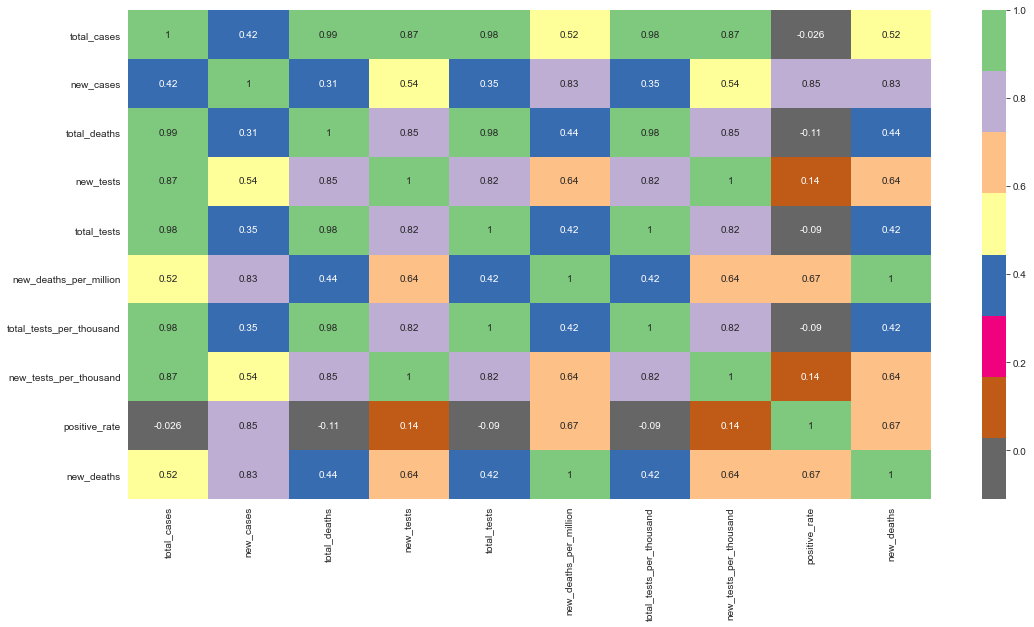

In [39]:
fig=plt.figure(figsize=(18,9))

sns.heatmap(df_asia.corr(),cmap="Accent_r",annot=True)

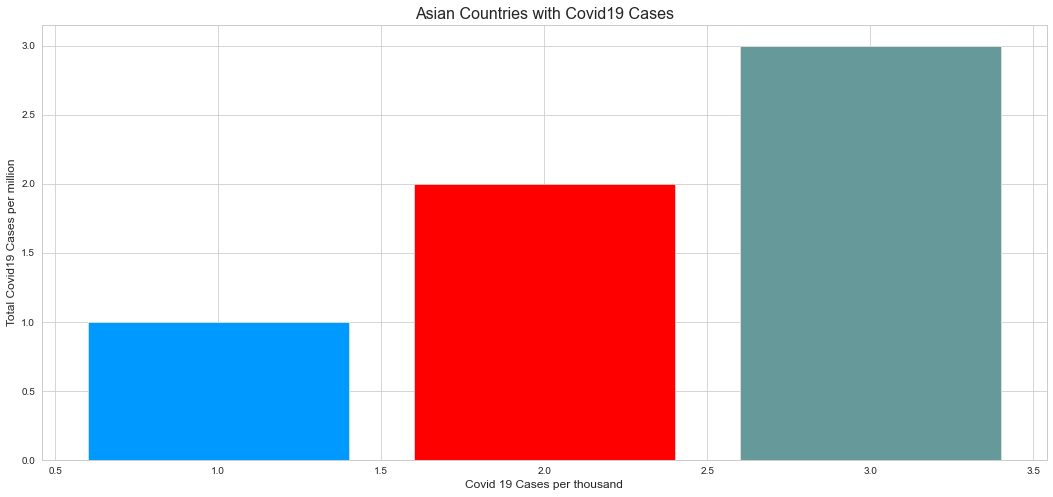

In [40]:
india_data=india_data.sort_values("total_cases",ascending=True)
fig=plt.figure(figsize=(18,8))
plt.bar(india_data["total_cases"][:10],india_data["total_cases"][:10],color=["#ff9900","#ffff00","#0099ff","#ff0000","#99ff33","#9900ff","#ff3399","#cc99ff","#ff9933","#669999"])
plt.xlabel("Covid 19 Cases per thousand")
plt.ylabel("Total Covid19 Cases per million")
plt.style.use("ggplot")
plt.title("Asian Countries with Covid19 Cases",fontsize=16)
plt.show()

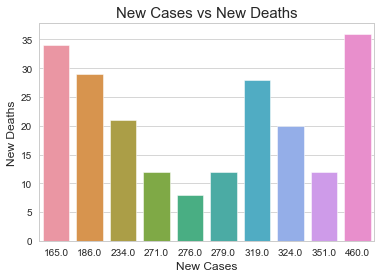

In [42]:
sns.barplot(x="new_cases", y="new_deaths", data=covid_data[120:130])
sns.set_style("whitegrid")
plt.title("New Cases vs New Deaths",fontsize=15)
plt.xlabel("New Cases")
plt.ylabel("New Deaths")
plt.show()


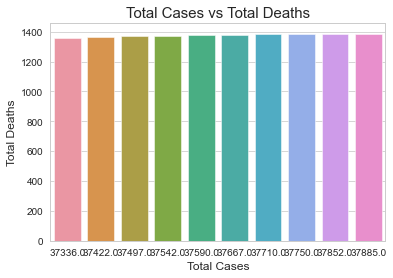

In [43]:
sns.barplot(x="total_cases", y="total_deaths", data=covid_data[170:180])
sns.set_style("whitegrid")
plt.title("Total Cases vs Total Deaths",fontsize=15)
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.show()

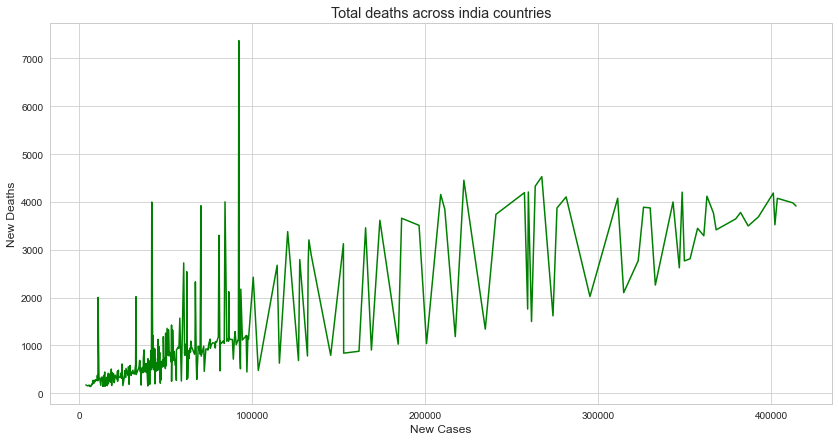

In [44]:
plt.figure(figsize=(14,7))
sns.lineplot(x = 'new_cases',y = 'new_deaths',data = top_10_india_deaths[0:400], color='green')
plt.title("Total deaths across india countries")
plt.xlabel("New Cases")
plt.ylabel("New Deaths")
plt.show()

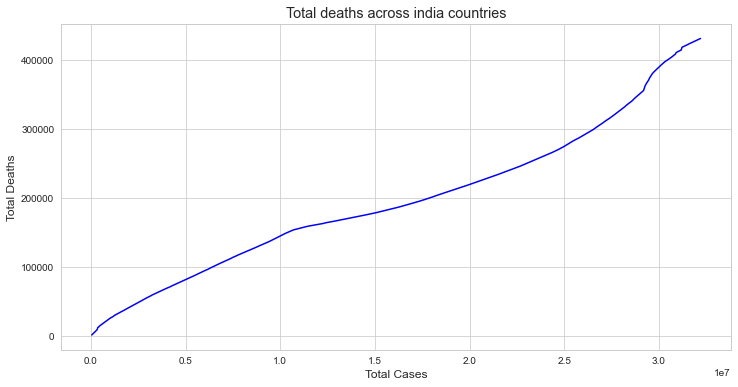

In [45]:
plt.figure(figsize=(12,6))
sns.lineplot(x = 'total_cases',y = 'total_deaths',data = top_10_india_deaths[0:400], color='blue')
plt.title("Total deaths across india countries")
plt.xlabel('Total Cases')
plt.ylabel("Total Deaths")
plt.show()

# Conclusions:

India is the most affected Asian country as it has the highest number of deaths.

Total Cases and New Cases are increasing gradually.

Total Deaths and New Deaths are increasing gradually.